en3/*/
['en3/DQN_vs_PPOabundant_high_n_p/', 'en3/DQN_vs_PPOabundant_low_n_p/', 'en3/DQN_vs_PPOscarse_high_n_f/', 'en3/DQN_vs_PPO_scarse_high_n_p/', 'en3/DQN_vs_PPO_scarse_low_n_p/']
en3/DQN_vs_PPOabundant_high_n_p/
Number of iterations player0: 274
Number of iterations player1: 274
Number of total episodes player 0: 1096
Number of total episodes player 1: 1095
[50000.]
[50000.]


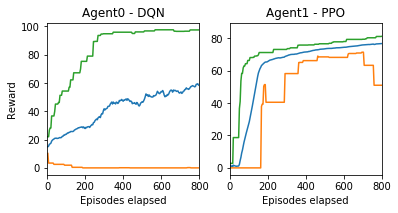

en3/DQN_vs_PPOabundant_low_n_p/
Number of iterations player0: 274
Number of iterations player1: 274
Number of total episodes player 0: 1096
Number of total episodes player 1: 1095
[50000.]
[50000.]


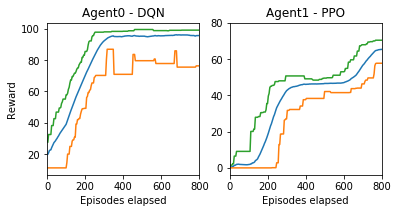

en3/DQN_vs_PPOscarse_high_n_f/
Number of iterations player0: 274
Number of iterations player1: 274
Number of total episodes player 0: 1096
Number of total episodes player 1: 1095
[50000.]
[50000.]


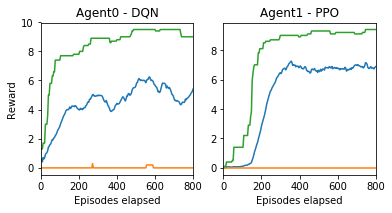

en3/DQN_vs_PPO_scarse_high_n_p/
Number of iterations player0: 472
Number of iterations player1: 471
Number of total episodes player 0: 1888
Number of total episodes player 1: 1884
[50000.]
[50000.]


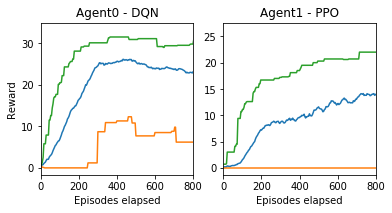

en3/DQN_vs_PPO_scarse_low_n_p/
Number of iterations player0: 851
Number of iterations player1: 851
Number of total episodes player 0: 3404
Number of total episodes player 1: 3403
[50000.]
[50000.]


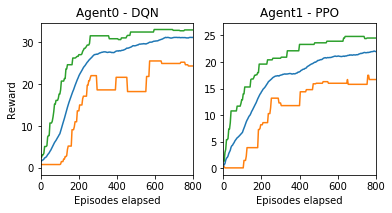

In [1]:
%matplotlib inline

import os
import glob
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import pprint
from sklearn.preprocessing import MinMaxScaler

experiment_path = "explor_exp/*/"
experiment_path = "en3/*/"
#experiment_path = "out/*/"
EPISODE_NORMALISATION=800
location= "/home/kurt/x/assignments/credit/R250/R252-R/image"

def parse(path):
    df = pd.read_csv(path, index_col="episodes_total")
    episodes_per_step = df.index.to_list()
    episode_reward_max = df['episode_reward_max'].to_list()
    episode_reward_min = df['episode_reward_min'].to_list()
    episode_reward_mean = df['episode_reward_mean'].to_list()
 
    assert(len(episode_reward_mean) == len(episode_reward_min) == len(episode_reward_max))
    return (episodes_per_step,
            episode_reward_max,
            episode_reward_min,
            episode_reward_mean)

def s(a3,a2,a1):
    sds2 = len(a3)
    a3 = np.array(a3).reshape(-1,1)
    a2 = np.array(a2).reshape(-1,1)
    a1 = np.array(a1).reshape(-1,1)
    
    cc=np.concatenate([a3,a2,a1], axis=0)
    #import ipdb; ipdb.set_trace()
    x_sample = [0, 50_000]
   
    scaler = MinMaxScaler(feature_range=(0, 100))
    scaler.fit(np.array(x_sample)[:, np.newaxis])
    print(scaler.data_max_)
    abnormal_data = scaler.transform(cc)
    r3 = abnormal_data[0:sds2]
    r2 = abnormal_data[sds2:sds2*2]
    r1 = abnormal_data[sds2*2:]
    return  r3, r2, r1
 
def show(player1, player2, x=None):
    print("Number of iterations player0:", len(player1[0]))
    print("Number of iterations player1:", len(player2[0]))
    print("Number of total episodes player 0:", player1[0][-1])
    print("Number of total episodes player 1:", player2[0][-1])
    #import ipdb; ipdb.set_trace()
    fig = plt.figure(figsize=(6, 2.8))
    plt.subplot(1, 2, 1)
     
    if x is not None and "PPO_vs_PPO" in x:
        plt.title("Agent0 - PPO")
    else:
        plt.title("Agent0 - DQN")
        
    s3, s2, s1 = s(player1[3], player1[2], player1[1])
    
    plt.plot(player1[0], s3,  label="avg reward")
    plt.plot(player1[0], s2,  label="min reward")
    plt.plot(player1[0], s1,  label="max reward")
    plt.xlim((0, EPISODE_NORMALISATION))
   # plt.ylim((0, 100))
    plt.ylabel("Reward")
    plt.xlabel("Episodes elapsed")
    plt.subplot(1, 2, 2)
    s3, s2, s1 = s(player2[3], player2[2], player2[1])
   
    if  x is not None and "DQN_vs_DQN" in x:
        plt.title("Agent1 - DQN")
    else:
        plt.title("Agent1 - PPO")
    plt.plot(player2[0], s3,  label="avg reward")
    plt.plot(player2[0], s2,  label="min reward")
    plt.plot(player2[0], s1,  label="max reward")
    plt.xlabel("Episodes elapsed")
    if x == "env_expr/DQN_vs_PPOscarse_high_n_f/":
      plt.legend(loc=4)
    plt.xlim((0, EPISODE_NORMALISATION))
    #plt.ylim((0, 100))
    if x is not None:
        pp = os.path.join(location, x[:-1].replace("/", "_") + ".png")
        #plt.savefig(pp, bbox_inches='tight',  format='png', dpi=600)
    plt.show()
    
print(experiment_path)
experiments=glob.glob(experiment_path)

print(experiments)



for x in experiments:
    print(x)
    with open(os.path.join(x,"experiment.json")) as json_file:
        data = json.load(json_file)
    
    parameters = os.path.join(x, "player1/progress.csv")
    try:
      results_path_player1 = os.path.join(x, "player1/progress.csv")
      results_path_player0 = os.path.join(x, "player0/progress.csv")
      show(parse(results_path_player0), parse(results_path_player1), x)
    except:
        print("skipping", x)

en3/DQN_vs_PPOabundant_high_n_p/
Number of iterations player0: 274
Number of iterations player1: 274
Number of total episodes player 0: 1096
Number of total episodes player 1: 1095
[50000.]
[50000.]


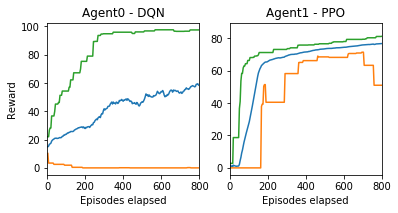

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


,0
size,42
num_players,2
murder_mode,True
steps_per_episode,1000
player_move_cost,0
player_respawn_time,200
food_reward,50
food_respawn_time,5
food_level,7
beam_color_diff,True


,move_up,move_down,move_left,move_right,nothing,shoot,median reward,avg reward,algo
player0,0.261,0.259,0.18,0.189,0.01,0.1,91.95,80.929,DQN
player1,0.285,0.095,0.336,0.26,0.006,0.018,32.15,34.638,PPO


------------------------------------------------------
en3/DQN_vs_PPOabundant_low_n_p/
Number of iterations player0: 274
Number of iterations player1: 274
Number of total episodes player 0: 1096
Number of total episodes player 1: 1095
[50000.]
[50000.]


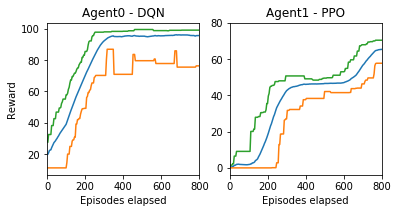

,0
size,42
num_players,2
murder_mode,True
steps_per_episode,1000
player_move_cost,0
player_respawn_time,2
food_reward,50
food_respawn_time,5
food_level,7
beam_color_diff,True


,move_up,move_down,move_left,move_right,nothing,shoot,median reward,avg reward,algo
player0,0.331,0.249,0.269,0.151,0,0,7.65,39.075,DQN
player1,0.045,0.057,0.113,0.457,0.047,0.282,3.55,17.293,PPO


------------------------------------------------------
en3/DQN_vs_PPOscarse_high_n_f/
Number of iterations player0: 274
Number of iterations player1: 274
Number of total episodes player 0: 1096
Number of total episodes player 1: 1095
[50000.]
[50000.]


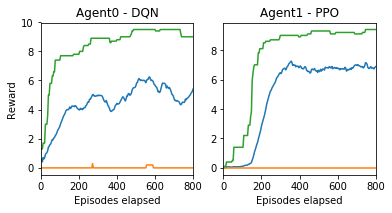

,0
size,42
num_players,2
murder_mode,True
steps_per_episode,1000
player_move_cost,0
player_respawn_time,200
food_reward,50
food_respawn_time,50
food_level,2
beam_color_diff,True


,move_up,move_down,move_left,move_right,nothing,shoot,median reward,avg reward,algo
player0,0.113,0.023,0.762,0.044,0.04,0.017,0.4,1.201,DQN
player1,0.069,0.074,0.078,0.101,0.452,0.226,8.9,7.391,PPO


------------------------------------------------------
en3/DQN_vs_PPO_scarse_high_n_p/
Number of iterations player0: 472
Number of iterations player1: 471
Number of total episodes player 0: 1888
Number of total episodes player 1: 1884
[50000.]
[50000.]


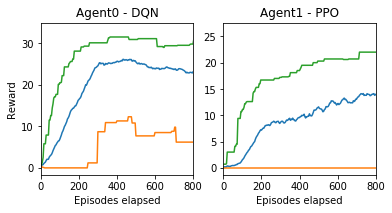

,0
size,42
num_players,2
murder_mode,True
steps_per_episode,1000
player_move_cost,0
player_respawn_time,200
food_reward,50
food_respawn_time,14
food_level,2
beam_color_diff,True


,move_up,move_down,move_left,move_right,nothing,shoot,median reward,avg reward,algo
player0,0.153,0.166,0.138,0.22,0.052,0.27,22.65,19.662,DQN
player1,0.089,0.279,0.118,0.239,0.202,0.073,0.25,2.323,PPO


------------------------------------------------------
en3/DQN_vs_PPO_scarse_low_n_p/
Number of iterations player0: 851
Number of iterations player1: 851
Number of total episodes player 0: 3404
Number of total episodes player 1: 3403
[50000.]
[50000.]


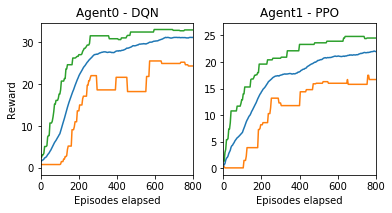

,0
size,42
num_players,2
murder_mode,True
steps_per_episode,1000
player_move_cost,0
player_respawn_time,2
food_reward,50
food_respawn_time,14
food_level,2
beam_color_diff,True


,move_up,move_down,move_left,move_right,nothing,shoot,median reward,avg reward,algo
player0,0.222,0.244,0.236,0.152,0.095,0.049,21.25,18.297,DQN
player1,0.068,0.15,0.285,0.259,0.003,0.235,4.2,5.298,PPO


------------------------------------------------------


In [2]:
from IPython.core.display import display, HTML
from IPython.display import display_html
import collections
def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def ss(x):
    return round((100)*(x-0)/(50_000-0), 3)
    
def showvideo(video_number):
    display(HTML("""<video width="300" height="300" controls><source src="{}" type="video/mp4"></video>""".format(video_number)))
    
datas = {}

for x in experiments:
  print(x)
  results_path_player1 = os.path.join(x, "player1/progress.csv")
  results_path_player0 = os.path.join(x, "player0/progress.csv") 
  show(parse(results_path_player0), parse(results_path_player1))
  with open(os.path.join(x,"experiment.json")) as json_file:
    parameters = json.load(json_file)
    
    if "exploration_config" in parameters['agent0_configs']:
        parameters['agent0_configs']['exp_c'] = parameters['agent0_configs'].pop('exploration_config')
    if "exploration_config" in parameters['agent1_configs']:
        parameters['agent1_configs']['exp_c'] = parameters['agent1_configs'].pop('exploration_config')
        
    agent0config = pd.DataFrame([flatten(parameters['agent0_configs'])]).T
    agent0config.columns = ['player0']
    agent1config = pd.DataFrame([flatten(parameters['agent1_configs'])]).T
    agent1config.columns = ['player1']
    env = pd.DataFrame([parameters['env_configs']]).T
    

    with open(os.path.join(x,"results_eval.json")) as json_file:
            data = json.load(json_file)
            showvideo(os.path.join(x,"render/output.mp4"))
            import pandas as pd
            d = pd.DataFrame(0, index= list(data['player0_action_distribution'].keys()) + ['median reward', 'avg reward', "algo"], columns=['player0', 'player1'])
            l1 = list(data['player0_action_distribution'].values())
            l2 = list(data['player1_action_distribution'].values()) 
            
            l1 = [round(x, 3) for x in l1]
            l2 = [round(x, 3) for x in l2]
            d['player0']= l1 + [ss(data['player0_median']), ss(data['player0_reward']), parameters['agent0_alg']]
            d['player1'] = l2 + [ss(data['player1_median']), ss(data['player1_reward']), parameters['agent1_alg']]
            display_side_by_side(env, agent0config, agent1config)
            d = d.round(1)
            d = d.drop(['rotate_right', 'rotate_left'], axis=0)
            display(d.T)
            sdsds = x.split("/")[:-1][-1].replace("_", "-").replace("DQN-vs-PPO", "")
            datas[sdsds] = d
            print("------------------------------------------------------")

In [3]:
col = ["move_up", "move_down", "move_left", "move_right", "nothing", "shoot", "median reward", "avg reward", "algo"]


dsds = pd.DataFrame(index=datas.keys(), columns=col, dtype=str)
    
for k,v in datas.items():
    v = v.copy()
    v['player1'] = v['player1'].astype(str)
    v['player0'] = v['player0'].astype(str)
    v['player0'] = v['player0'] + " / "
    v = (v["player0"] + v["player1"])
    dsds.loc[k] = v
    
dsds= dsds.T
#dsds=dsds.drop(['normal'], axis=1)
display(dsds)
dsds= dsds.T

dsds.columns = ["mv-up", "mv-down", "mv-left", "mv-right", "nothing", "shoot", "median-rwd", "avg-rwd", "algo"]
print(dsds.T.to_latex(escape = False))


,abundant-high-n-p,abundant-low-n-p,scarse-high-n-f,-scarse-high-n-p,-scarse-low-n-p
move_up,0.261 / 0.285,0.331 / 0.045,0.113 / 0.069,0.153 / 0.089,0.222 / 0.068
move_down,0.259 / 0.095,0.249 / 0.057,0.023 / 0.074,0.166 / 0.279,0.244 / 0.15
move_left,0.18 / 0.336,0.269 / 0.113,0.762 / 0.078,0.138 / 0.118,0.236 / 0.285
move_right,0.189 / 0.26,0.151 / 0.457,0.044 / 0.101,0.22 / 0.239,0.152 / 0.259
nothing,0.01 / 0.006,0.0 / 0.047,0.04 / 0.452,0.052 / 0.202,0.095 / 0.003
shoot,0.1 / 0.018,0.0 / 0.282,0.017 / 0.226,0.27 / 0.073,0.049 / 0.235
median reward,91.95 / 32.15,7.65 / 3.55,0.4 / 8.9,22.65 / 0.25,21.25 / 4.2
avg reward,80.929 / 34.638,39.075 / 17.293,1.201 / 7.391,19.662 / 2.323,18.297 / 5.298
algo,DQN / PPO,DQN / PPO,DQN / PPO,DQN / PPO,DQN / PPO


\begin{tabular}{llllll}
\toprule
{} & abundant-high-n-p & abundant-low-n-p & scarse-high-n-f & -scarse-high-n-p & -scarse-low-n-p \\
\midrule
mv-up      &     0.261 / 0.285 &    0.331 / 0.045 &   0.113 / 0.069 &    0.153 / 0.089 &   0.222 / 0.068 \\
mv-down    &     0.259 / 0.095 &    0.249 / 0.057 &   0.023 / 0.074 &    0.166 / 0.279 &    0.244 / 0.15 \\
mv-left    &      0.18 / 0.336 &    0.269 / 0.113 &   0.762 / 0.078 &    0.138 / 0.118 &   0.236 / 0.285 \\
mv-right   &      0.189 / 0.26 &    0.151 / 0.457 &   0.044 / 0.101 &     0.22 / 0.239 &   0.152 / 0.259 \\
nothing    &      0.01 / 0.006 &      0.0 / 0.047 &    0.04 / 0.452 &    0.052 / 0.202 &   0.095 / 0.003 \\
shoot      &       0.1 / 0.018 &      0.0 / 0.282 &   0.017 / 0.226 &     0.27 / 0.073 &   0.049 / 0.235 \\
median-rwd &     91.95 / 32.15 &      7.65 / 3.55 &       0.4 / 8.9 &     22.65 / 0.25 &     21.25 / 4.2 \\
avg-rwd    &   80.929 / 34.638 &  39.075 / 17.293 &   1.201 / 7.391 &   19.662 / 2.323 &  18.297 / 5.2